In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('diem_thi_thpt_2024.csv',index_col=0)
data.head()

,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu
sbd,,,,,,,,,,
1000001,8.4,6.75,8.0,6.0,5.25,5.0,NaN,NaN,NaN,N1
1000002,8.6,8.50,7.2,NaN,NaN,NaN,7.25,6.00,8.00,N1
1000003,8.2,8.75,8.2,NaN,NaN,NaN,7.25,7.25,8.75,N1
1000004,4.8,8.50,7.4,NaN,NaN,NaN,7.00,6.00,7.50,N1
1000005,8.6,9.00,7.8,NaN,NaN,NaN,9.00,8.75,8.50,N1


Điểm trung bình từng môn:
 toan         6.447309
ngu_van      7.231146
ngoai_ngu    5.521938
vat_li       6.666866
hoa_hoc      6.680830
sinh_hoc     6.284079
lich_su      6.570343
dia_li       7.193541
gdcd         8.156503
dtype: float64


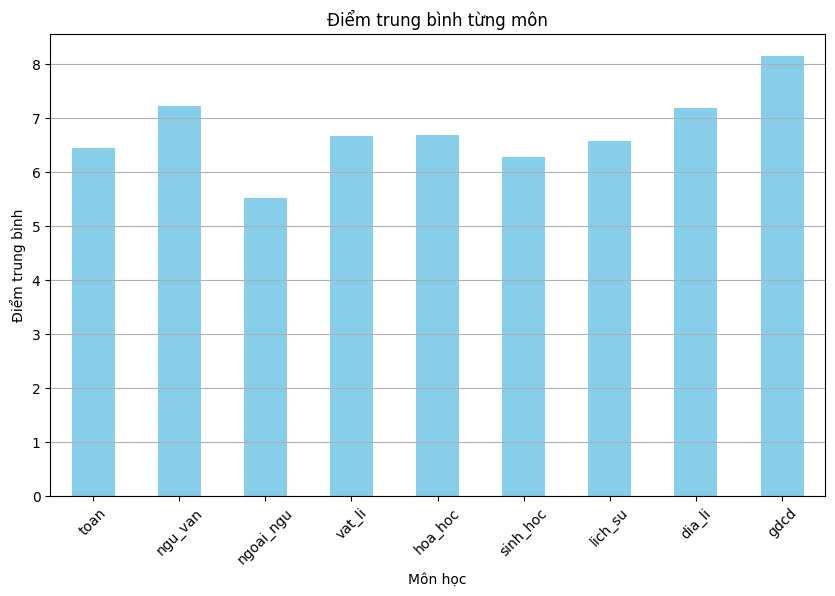

In [13]:
subjects = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']

mean_scores = data[subjects].mean()
print("Điểm trung bình từng môn:\n", mean_scores)

plt.figure(figsize=(10, 6))
mean_scores.plot(kind='bar', color='skyblue')
plt.title('Điểm trung bình từng môn')
plt.xlabel('Môn học')
plt.ylabel('Điểm trung bình')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [20]:
def phan_loai_khoi(row):
    row = row.fillna(0)
    if row['ma_ngoai_ngu'] != 'N1': return ('Khoi khac',0)
    khoi ={
        'A': row['toan'] + row['vat_li'] + row['hoa_hoc'],
        'A1': row['toan'] + row['vat_li'] + row['ngoai_ngu'],
        'B': row['toan'] + row['hoa_hoc'] + row['sinh_hoc'],
        'C': row['ngu_van'] + row['lich_su'] + row['dia_li'],
        'D': row['toan'] + row['ngu_van'] + row['ngoai_ngu'],
        'D7': row['toan'] + row['hoa_hoc'] + row['ngoai_ngu']
    }
    return max(khoi,key=khoi.get), max(khoi.values())
data['khoi'],data['diem_khoi'] = zip(*data.apply(phan_loai_khoi,axis=1))
data[['khoi', 'diem_khoi']].head()

,khoi,diem_khoi
sbd,,
1000001,D,23.15
1000002,D,24.30
1000003,D,25.15
1000004,C,21.50
1000005,C,26.75


Điểm trung bình theo khối:
 khoi
A            23.205416
A1           23.653705
B            21.815495
C            21.467165
D            21.959139
D7           23.928600
Khoi khac     0.000000
Name: diem_khoi, dtype: float64


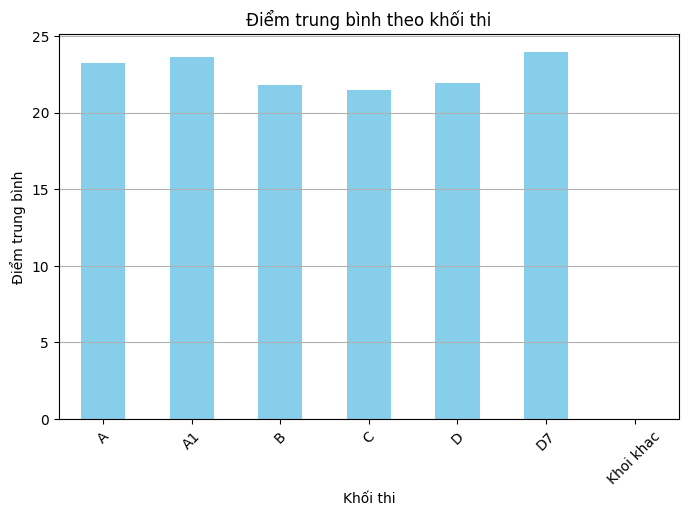

In [26]:
diem_tb_khoi = data.groupby('khoi')['diem_khoi'].mean()
print("Điểm trung bình theo khối:\n", diem_tb_khoi)

plt.figure(figsize=(8, 5))
diem_tb_khoi.plot(kind='bar', color='skyblue')
plt.title('Điểm trung bình theo khối thi')
plt.xlabel('Khối thi')
plt.ylabel('Điểm trung bình')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

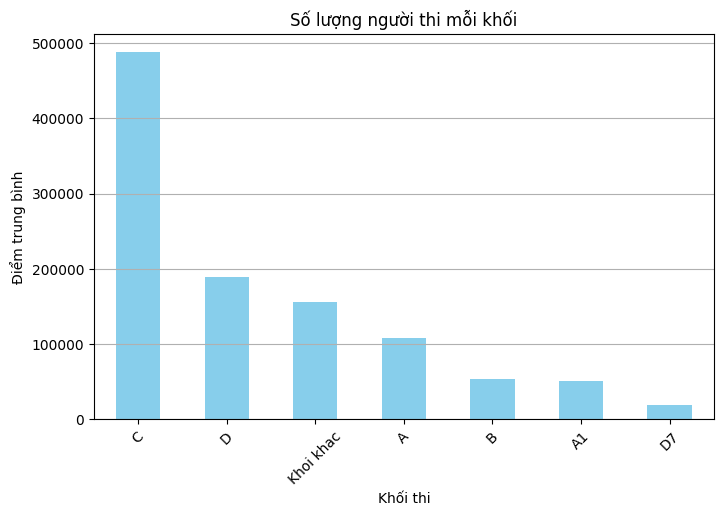

In [27]:
khoi_counts = data['khoi'].value_counts()
plt.figure(figsize=(8, 5))
khoi_counts.plot(kind='bar', color='skyblue')
plt.title('Số lượng người thi mỗi khối')
plt.xlabel('Khối thi')
plt.ylabel('Điểm trung bình')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

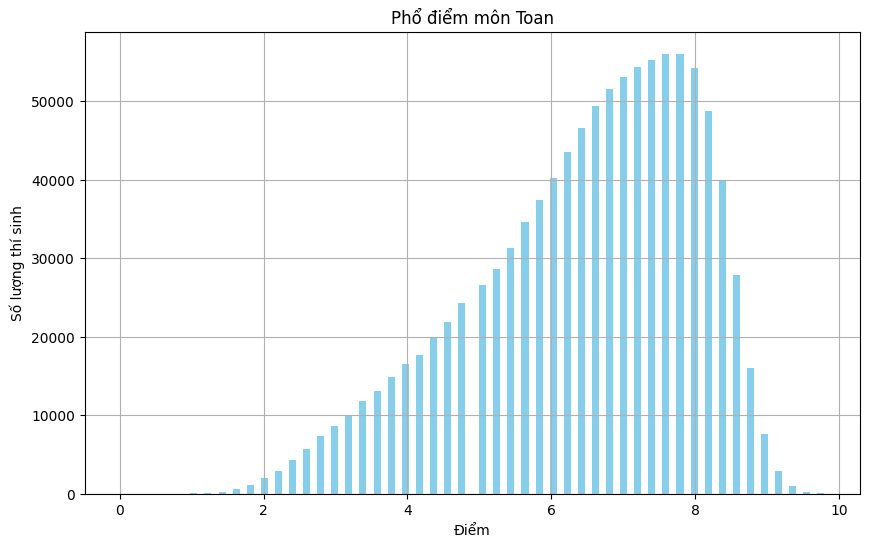

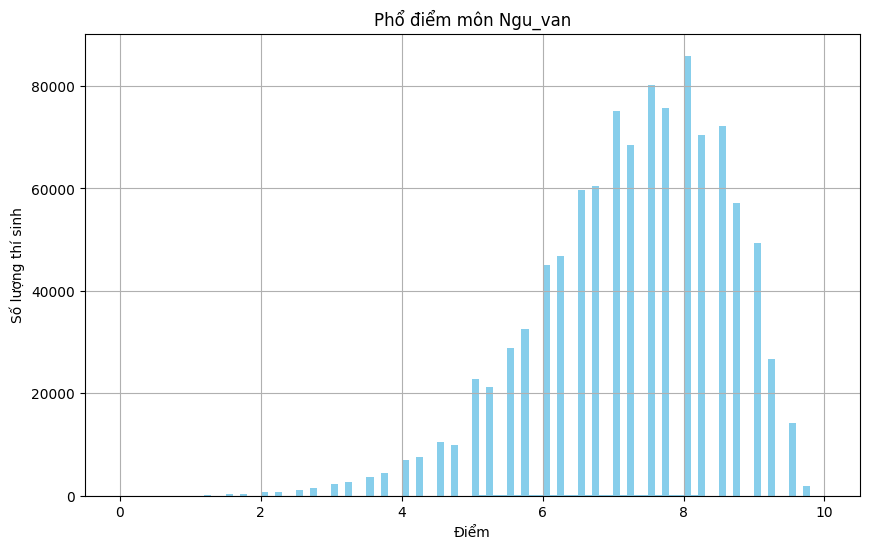

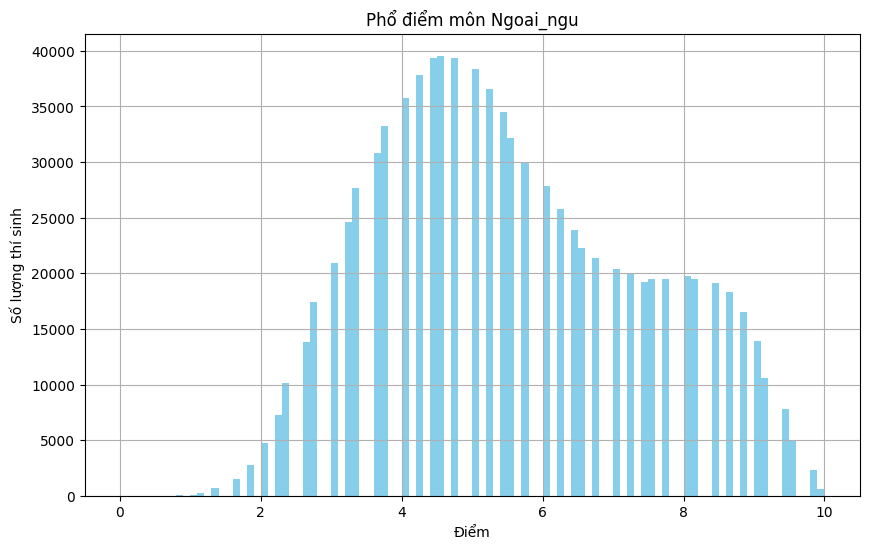

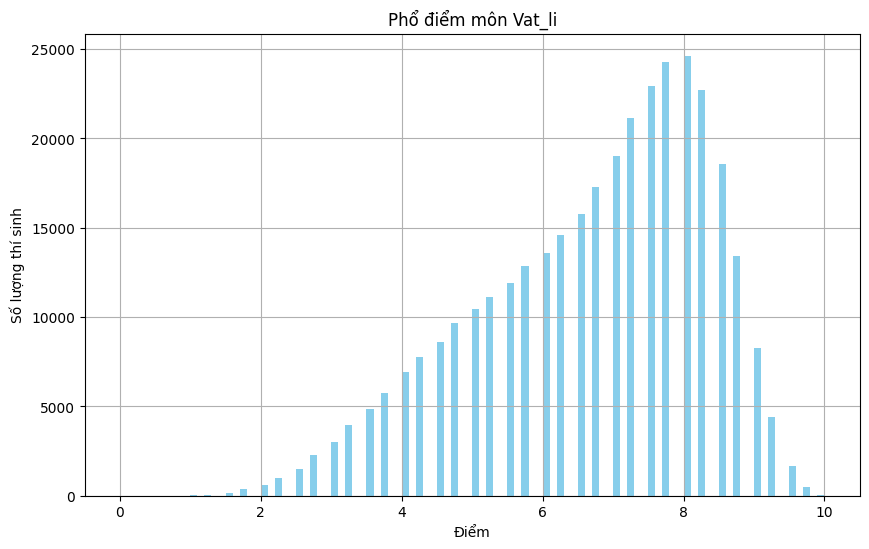

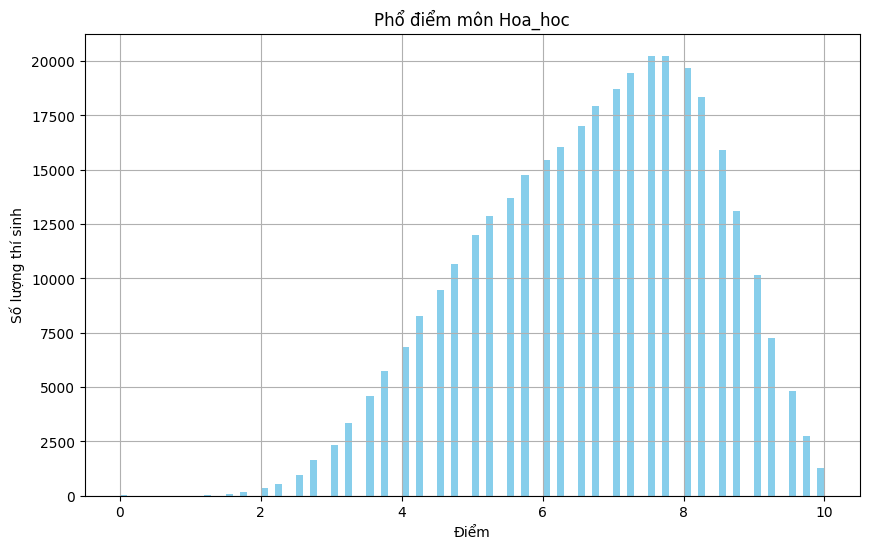

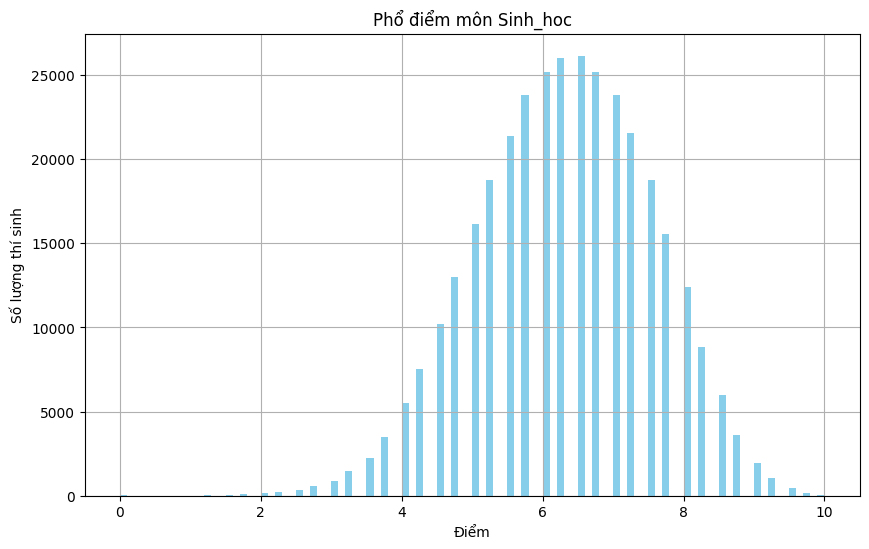

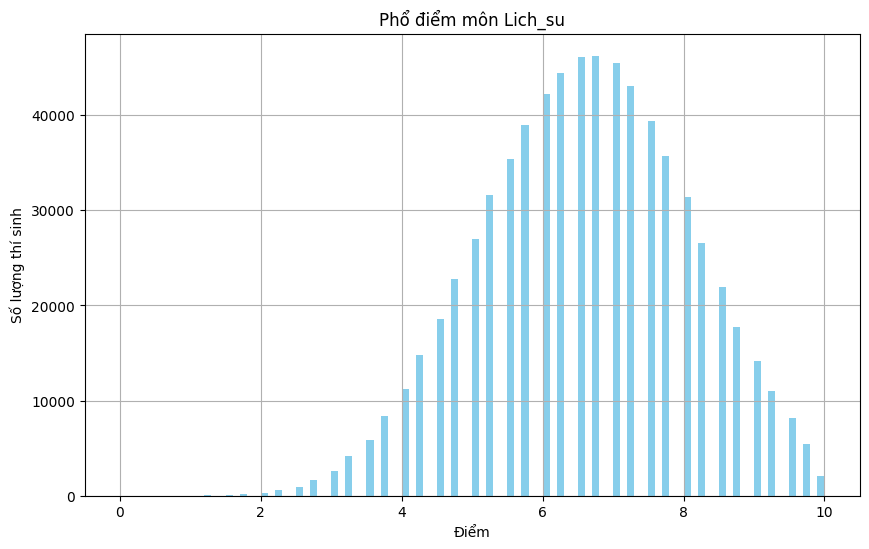

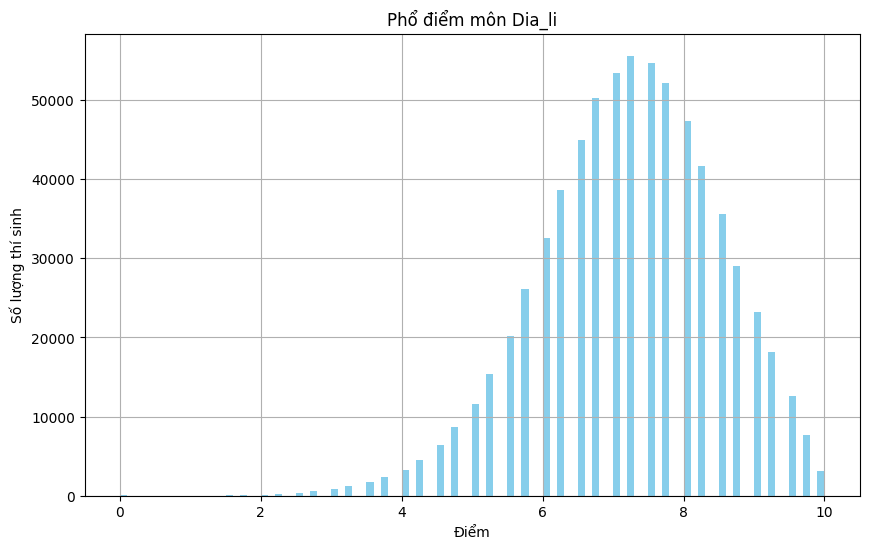

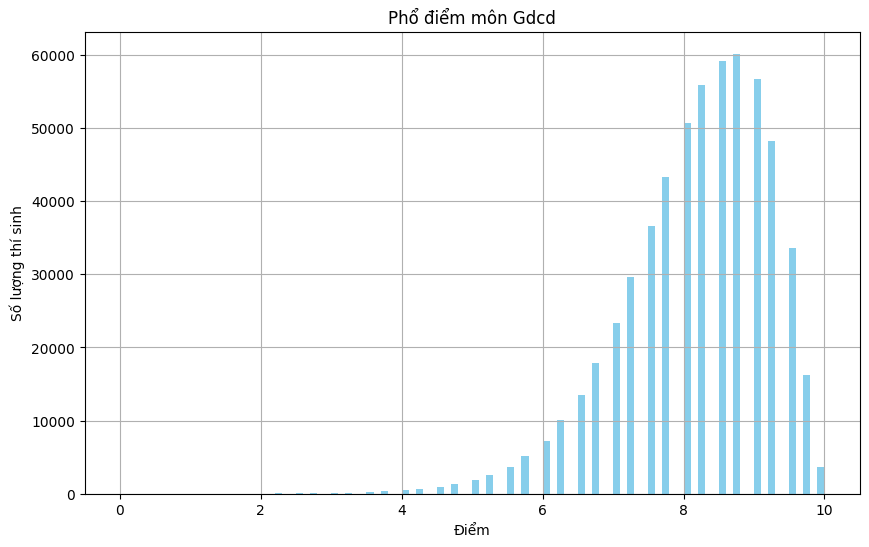

In [30]:
for subject in subjects:
    plt.figure(figsize=(10, 6))
    data[subject].hist(bins=100, color='skyblue')
    plt.title(f'Phổ điểm môn {subject.capitalize()}')
    plt.xlabel('Điểm')
    plt.ylabel('Số lượng thí sinh')
    plt.grid(True)
    plt.show()

In [31]:
def so_nguoi_liet(data):
    count = (data[subjects] <= 1).any(axis=1).sum()
    return count
liet_count = so_nguoi_liet(data)
print(f"Số thí sinh bị liệt: {liet_count}")
print(f"Tỷ lệ bị liệt: {liet_count / len(data) * 100:.2f}%")

Số thí sinh bị liệt: 462
Tỷ lệ bị liệt: 0.04%
